In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import os
import pandas as pd
from google.colab import drive
# 1. Mount Google Drive
# This step will prompt you to authorize Google Colab to access your Google Drive.
print("Mounting Google Drive...")
drive.mount('/content/drive/')
print("Google Drive mounted successfully!")
from datetime import datetime
# Get the current time
current_time = datetime.now()
# Print the current time
print("Current time:", current_time)

Mounting Google Drive...
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Google Drive mounted successfully!
Current time: 2025-06-24 04:22:43.636297


In [2]:
# 2. Define the path to your CSV files
csv_folder_path = '/content/drive/My Drive/LSTM_results'

In [3]:
# best model results
best_KGE_result_csv='/content/drive/My Drive/LSTM_results/best_KGE/best_KGE_result_' +   current_time.strftime("%Y%m%d%H%M") + ".csv"

In [4]:
# Check if the folder exists
if not os.path.exists(csv_folder_path):
    print(f"Error: Folder not found at '{csv_folder_path}'")


else:
    print(f"Accessing folder: {csv_folder_path}")

    # 3. List all CSV files in the specified folder
    csv_files = [f for f in os.listdir(csv_folder_path) if f.endswith('.csv')]

    if not csv_files:
        print(f"No CSV files found in '{csv_folder_path}'. Please check the folder content.")
    else:
        print(f"Found {len(csv_files)} CSV files:")
        for f in csv_files:
            print(f"- {f}")

        # 4. Initialize an empty list to store DataFrames
        all_dfs = []

        # 5. Loop through each CSV file, read it into a DataFrame, and append to the list
        print("\nReading and appending CSV files...")
        for csv_file in csv_files:
            file_path = os.path.join(csv_folder_path, csv_file)
            try:
                df = pd.read_csv(file_path)
                all_dfs.append(df)
                print(f"Successfully read: {csv_file}")
            except Exception as e:
                print(f"Error reading {csv_file}: {e}")

        # 6. Concatenate all DataFrames into a single DataFrame
        if all_dfs:
            try:
                combined_df = pd.concat(all_dfs, ignore_index=True)
                #print("\nAll CSV files successfully combined into one DataFrame!")
                #print("\nCombined DataFrame Info:")
                #combined_df.info()
                #print("\nFirst 5 rows of the combined DataFrame:")
               # print(combined_df.head())
                #print(f"\nTotal rows in combined DataFrame: {len(combined_df)}")
            except Exception as e:
                print(f"Error concatenating DataFrames: {e}")
        else:
            print("No DataFrames were successfully read to combine.")

# Optional: Save the combined DataFrame to a new CSV file in your Google Drive
# output_path = '/content/drive/My Drive/combined_data.csv'
# if 'combined_df' in locals(): # Check if combined_df was created
#     try:
#         combined_df.to_csv(output_path, index=False)
#         print(f"\nCombined DataFrame saved to: {output_path}")
#     except Exception as e:
#         print(f"Error saving combined DataFrame: {e}")

Accessing folder: /content/drive/My Drive/LSTM_results
Found 130 CSV files:
- 13304050_result_df_202506091614.csv
- 13304050_result_df_202506091619.csv
- 13304050_result_df_202506091621.csv
- 13342500_result_df_202506091628.csv
- 13342500_result_df_202506091630.csv
- 13342500_result_df_202506091633.csv
- 13342500_result_df_202506091637.csv
- 13311000_result_df_202506091913.csv
- 13311000_result_df_202506091949.csv
- 13311000_result_df_202506092022.csv
- 13310850_result_df_202506092032.csv
- 13340600_result_df_202506092055.csv
- 13340600_result_df_202506092102.csv
- 13340600_result_df_202506092106.csv
- 13340000_result_df_202506092112.csv
- 13340000_result_df_202506092122.csv
- 13340000_result_df_202506092128.csv
- 13340000_result_df_202506092134.csv
- 13317660_result_df_202506092138.csv
- 13317660_result_df_202506092142.csv
- 13154500_result_df_202506101531.csv
- 13154500_result_df_202506101539.csv
- 12322000_result_df_202506101545.csv
- 12322000_result_df_202506101549.csv
- 12322000_r

In [5]:
#print(combined_df)

#print( combined_df.sort_values(by=['current_time' ]).head(4) )

#print(combined_df[   combined_df['model_site'] == 13317660] )

print( combined_df.sort_values(by=['current_time','model_site','KGE']).tail(9) )

                   current_time  model_site         train_month   h1   h2  \
121  2025-06-23 14:53:04.471217    13311450  [3, 4, 5, 6, 7, 8]  256  100   
122  2025-06-23 15:14:02.137985    13311450  [3, 4, 5, 6, 7, 8]  256  128   
123  2025-06-23 15:26:08.907757    13311450  [3, 4, 5, 6, 7, 8]  256  128   
124  2025-06-23 15:45:40.752424    13311450  [3, 4, 5, 6, 7, 8]  256  128   
125  2025-06-23 22:14:01.299957    13311450  [3, 4, 5, 6, 7, 8]  256  128   
126  2025-06-24 04:02:42.875462    13304050  [3, 4, 5, 6, 7, 8]  256  128   
127  2025-06-24 04:11:09.449357    13304050  [3, 4, 5, 6, 7, 8]  256  128   
128  2025-06-24 04:13:41.635490    13304050  [3, 4, 5, 6, 7, 8]  256  128   
129  2025-06-24 04:16:27.991247    13304050  [3, 4, 5, 6, 7, 8]  256  128   

       d1     d2  batch  look_back  \
121  0.05  0.025     16         54   
122  0.05  0.025     16         54   
123  0.10  0.025     16         54   
124  0.10  0.050     16         54   
125  0.10  0.050     16         21   
1

In [6]:




#result = combined_df.loc[combined_df.groupby('model_site')['rmse'].idxmin()]

combined_df=combined_df.dropna()

result = combined_df.loc[combined_df.groupby('model_site')['KGE'].idxmax()]


#result =  combined_df.groupby('model_site').agg({'rmse': 'min', 'bias':'min','r2': 'max','KGE': 'max'})

print(result.sort_values(by=[  'KGE' , 'model_site' ]))

result.to_csv(best_KGE_result_csv)

                   current_time  model_site         train_month   h1   h2  \
80   2025-06-13 17:30:30.756569    13190500  [3, 4, 5, 6, 7, 8]  256  100   
129  2025-06-24 04:16:27.991247    13304050  [3, 4, 5, 6, 7, 8]  256  128   
103  2025-06-19 23:15:51.519690    12322000  [3, 4, 5, 6, 7, 8]  256  100   
59   2025-06-13 03:09:56.014300    13150430  [3, 4, 5, 6, 7, 8]  100  100   
116  2025-06-20 17:09:33.906215    13310850  [3, 4, 5, 6, 7, 8]  256  100   
120  2025-06-20 17:36:27.904470    13342500  [3, 4, 5, 6, 7, 8]  256  100   
63   2025-06-13 15:25:43.450260    13341050  [3, 4, 5, 6, 7, 8]  200  100   
92   2025-06-17 19:45:33.846027    12305000  [3, 4, 5, 6, 7, 8]  256  100   
101  2025-06-17 21:26:44.970142    13296000  [3, 4, 5, 6, 7, 8]  256  100   
95   2025-06-17 19:55:35.469097    13311450  [3, 4, 5, 6, 7, 8]  256  100   
73   2025-06-13 16:48:10.037075    13192200  [3, 4, 5, 6, 7, 8]  256  100   
34   2025-06-11 17:23:03.883799    13176400  [3, 4, 5, 6, 7, 8]  100  100   

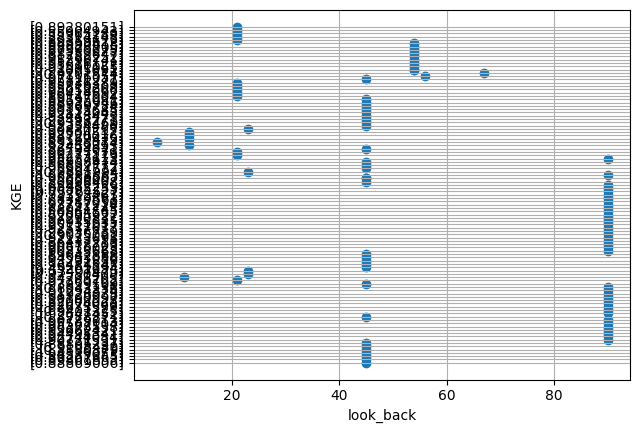

In [7]:
x='look_back'
y='KGE'

combined_df=combined_df.dropna()

# Scatter plot of two columns
plt.scatter( combined_df[  x],  combined_df[ y])
plt.xlabel( x)
plt.ylabel( y )
plt.title( '')
plt.grid(True)
plt.show()


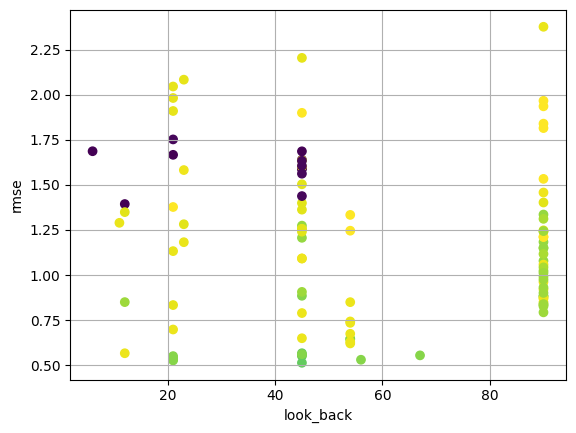

In [8]:
x='look_back'
y='rmse'

combined_df=combined_df.dropna()

# Scatter plot of two columns
plt.scatter( combined_df[  x],  combined_df[ y] , c= combined_df['model_site'] )
plt.xlabel( x)
plt.ylabel( y )
plt.title('' )
plt.grid(True)
plt.show()

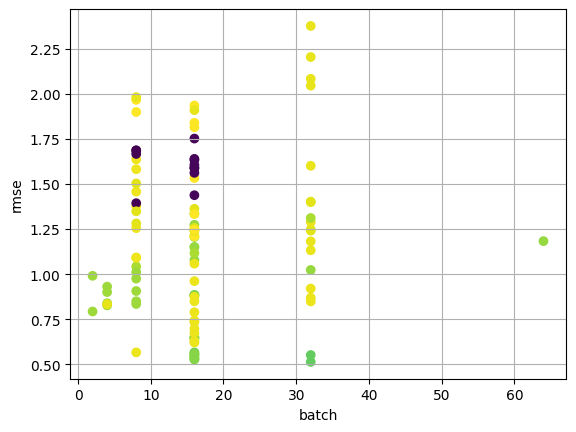

In [9]:
x='batch'
y='rmse'

combined_df=combined_df.dropna()

# Scatter plot of two columns
plt.scatter( combined_df[  x],  combined_df[ y] , c= combined_df['model_site'] )
plt.xlabel( x)
plt.ylabel( y )
plt.title('' )
plt.grid(True)
plt.show()